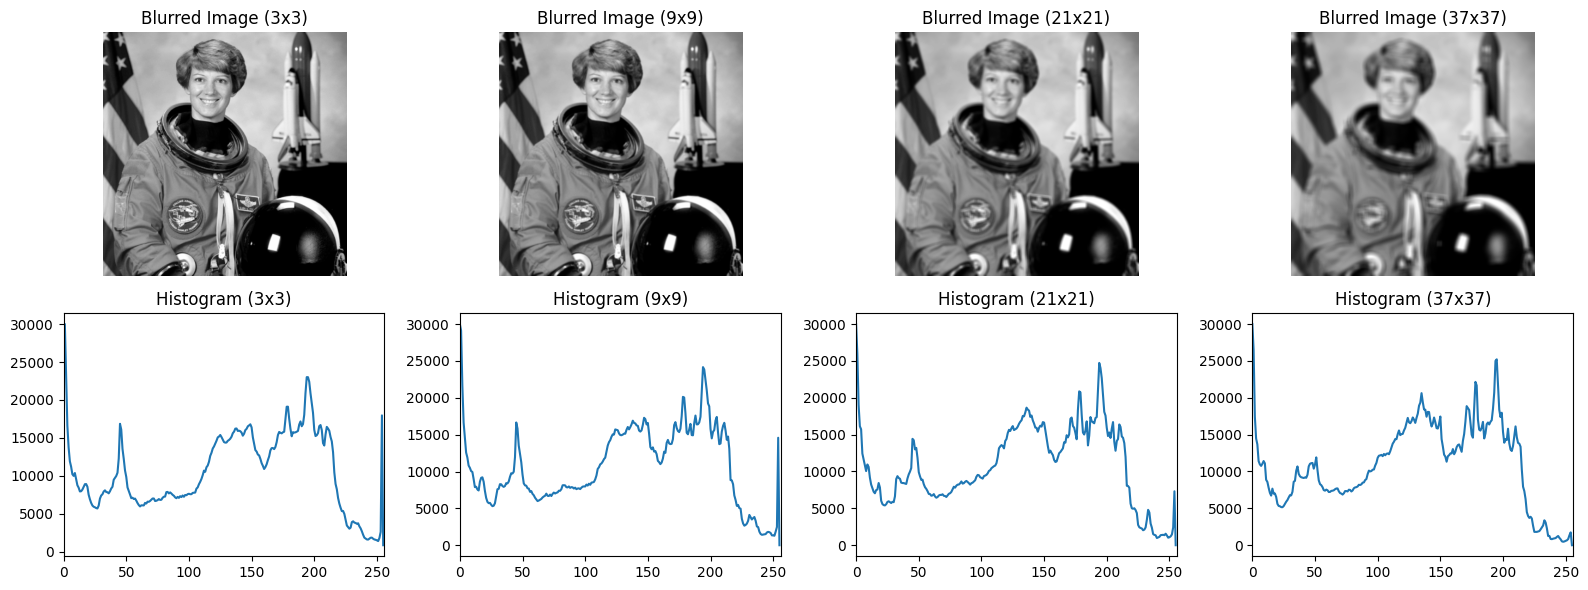

In [43]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 이미지 불러오기 (Grayscale로)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# 다양한 커널 사이즈 설정
kernel_sizes = [3, 9, 21, 37]

# 서브플롯 크기 설정
cols = len(kernel_sizes)
rows = 2  

# 1x6 형태로 서브플롯 크기 설정
plt.figure(figsize=(cols*4, rows*3))

# 각 커널 사이즈에 대해 블러링된 이미지와 히스토그램 출력
for i, ks in enumerate(kernel_sizes):
    kernel = np.ones((ks, ks), np.float32) / ks**2  # 평균 커널 생성
    blurred_image = cv2.filter2D(image, -1, kernel)  # 평균 블러링 적용
    
    # 블러링된 이미지 출력 (첫 번째 줄)
    plt.subplot(rows, cols, 1 + i)
    plt.imshow(blurred_image, cmap='gray')
    plt.title(f'Blurred Image ({ks}x{ks})')
    plt.axis('off')

    # 블러링된 이미지 히스토그램 출력 (두 번째 줄)
    blurred_hist = cv2.calcHist([blurred_image], [0], None, [256], [0, 256])
    
    # 히스토그램의 빈도가 너무 많은 값들을 제외
    max_threshold = 30_000  # 최대 빈도수 설정 (이 값을 초과하는 빈도는 제외)
    blurred_hist[blurred_hist > max_threshold] = max_threshold  # 최대 빈도수로 클리핑
    
    plt.subplot(rows, cols, cols + i + 1)
    plt.plot(blurred_hist)
    plt.title(f'Histogram ({ks}x{ks})')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()
